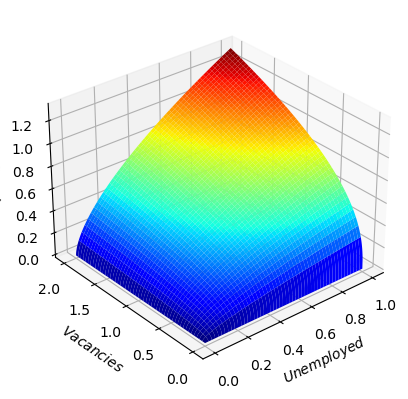

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for colormaps
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('tableau-colorblind10')
lines = ["-","--","-.",":","-","--","-.",":"]
## Wage optimality from utility: h^(φ-1)/c^(-σ) = w
## Wage optimality from firm: y = Ah 


φ = 0.6
AA= 0.15
δ = 0.05 #separation probability
b = 0.7 #unemployment benefits
μ = 0.4 #bargaining power
r = 0.06 #interest rate
κ = 0.7 #vacancy posting cost
y = 3 #firm productivity

def M(u,v,φ):
    #out = AA*u**(φ)*v**(1-φ)
    out  = u**(φ)*v**(1-φ)
    return out

## The indifference curves
# A vector for vacancy values
v_vec = np.linspace(0,2,1000)
u_vec = np.linspace(0,1,1000)


# b. Create meshgrids similar to x1_values and x2_values above
m1_mesh,m2_mesh = np.meshgrid(u_vec,v_vec,indexing='ij')

m_values_mesh = M(m1_mesh, m2_mesh, φ)

fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(m1_mesh,m2_mesh,m_values_mesh,cmap=cm.jet); # create surface plot in the axis
ax.view_init(30, 230)
ax.set_xlabel('$Unemployed$')
ax.set_ylabel('$Vacancies$')
ax.set_zlabel('$M(u,v)$')
plt.savefig('3d_indiff.pdf')

C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\1286655780.py:9: RuntimeWarning: divide by zero encountered in power
  out = AA*θ**(-φ)


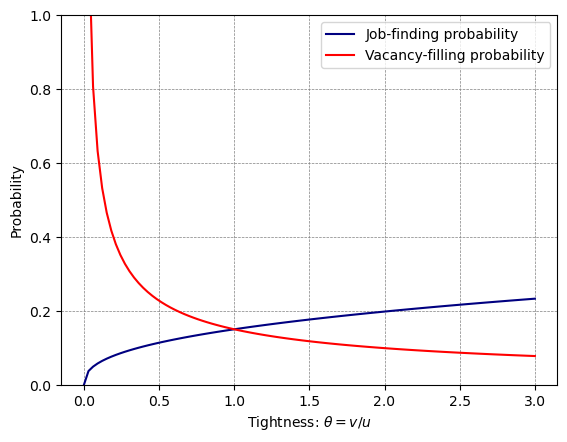

C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\1286655780.py:9: RuntimeWarning: divide by zero encountered in power
  out = AA*θ**(-φ)


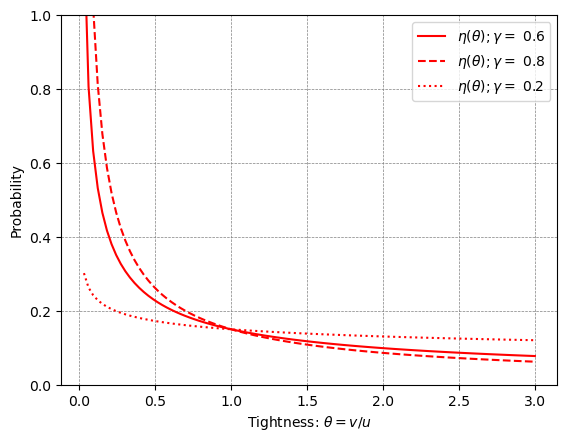

In [13]:
## Job finding probability
θ_vec = np.linspace(0,3,100)

def f(θ,φ):
    out = AA*θ**(1-φ)
    return out

def η(θ,φ):
    out = AA*θ**(-φ)
    return out

finding = f(θ_vec,φ)
filling = η(θ_vec,φ)

plt.plot(θ_vec,finding, color = 'navy', label ='Job-finding probability', linestyle = 'dashed')
plt.plot(θ_vec,filling, color = 'red', label ='Vacancy-filling probability', linestyle = 'dotted')
plt.ylim(0,1)
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'Tightness: $\theta = v/u$')
plt.ylabel(r'Probability')
plt.savefig('probabilities.pdf')
plt.show()

## Congestion externality
plt.plot(θ_vec,η(θ_vec,φ), color = 'red', label =r'$\eta(\theta); \gamma =$ ' + str(φ))
plt.plot(θ_vec,η(θ_vec,0.8), color = 'red', label =r'$\eta(\theta); \gamma =$ ' + str(0.8), linestyle = 'dashed')
plt.plot(θ_vec,η(θ_vec,0.2), color = 'red', label =r'$\eta(\theta); \gamma =$ ' + str(0.2), linestyle = 'dotted')
plt.ylim(0,1)
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.xlabel(r'Tightness: $\theta = v/u$')
plt.ylabel(r'Probability')
plt.savefig('congestion.pdf')
plt.show()

C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\116208781.py:3: RuntimeWarning: divide by zero encountered in divide
  v_bev = ((δ/u_vec-δ)/AA)**(1/(1-φ))*u_vec
C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\116208781.py:3: RuntimeWarning: invalid value encountered in multiply
  v_bev = ((δ/u_vec-δ)/AA)**(1/(1-φ))*u_vec


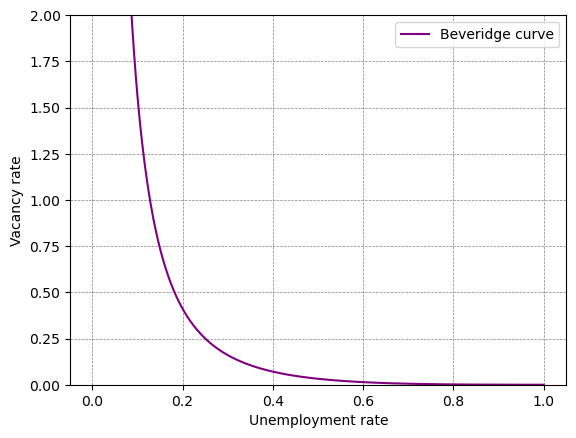

In [3]:
## Beveridge curve
#u = delta/(delta+AA*(v/u)**(1-φ))
v_bev = ((δ/u_vec-δ)/AA)**(1/(1-φ))*u_vec 
plt.plot(u_vec,v_bev, label = 'Beveridge curve', color = 'purple')
plt.ylim(0,2)
plt.xlabel('Unemployment rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Vacancy rate')
plt.legend()
plt.savefig('beveridge_model.pdf')
plt.show()

C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\1286655780.py:9: RuntimeWarning: divide by zero encountered in power
  out = AA*θ**(-φ)


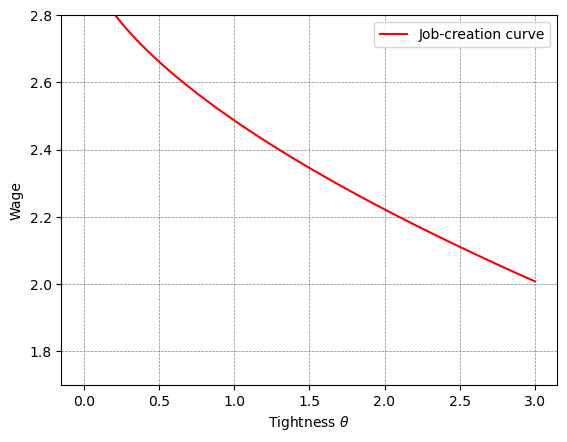

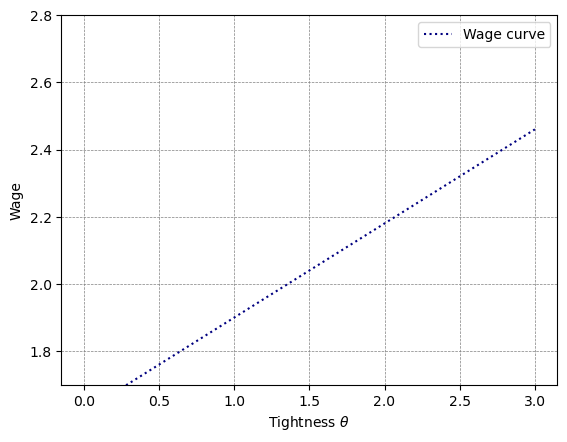

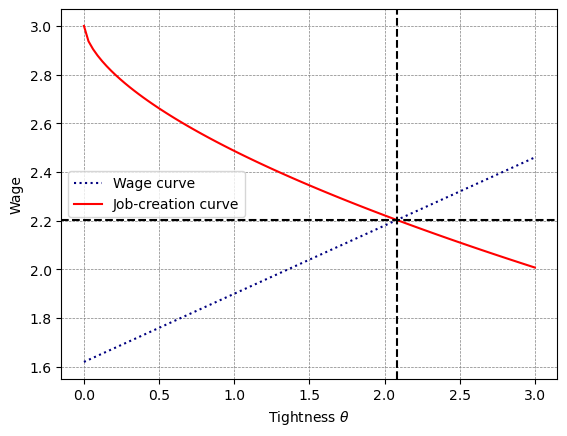

In [14]:
## The Job creation curve
w_jc = y-(r+δ)/η(θ_vec,φ) * κ

## The wage curve
w_wc = μ*κ*θ_vec + μ*y + (1-μ)*b

## Find equilibrium tightness
from scipy import optimize
def fct_θ(guess):
    out = μ*κ*guess + μ*y + (1-μ)*b - (y-(r+δ)/η(guess,φ) * κ)
    return out**2
opt_θ = optimize.newton(fct_θ, 2) 
opt_w = y-(r+δ)/η(opt_θ,φ) * κ

## Build figure in stages
#Job-creation
plt.plot(θ_vec,w_jc, label = 'Job-creation curve', color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(1.7, 2.8)
plt.ylabel('Wage')
plt.xlabel(r'Tightness $\theta$')
plt.legend()
plt.savefig('jccurve.pdf')
plt.show()

#Wage curve
plt.plot(θ_vec,w_wc, label = 'Wage curve', color = 'navy', linestyle = 'dotted')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylim(1.7, 2.8)
plt.ylabel('Wage')
plt.xlabel(r'Tightness $\theta$')
plt.legend()
plt.savefig('wagecurve.pdf')
plt.show()


plt.plot(θ_vec,w_wc, label = 'Wage curve', color = 'navy', linestyle = 'dotted')
plt.plot(θ_vec,w_jc, label = 'Job-creation curve', color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(opt_θ, color= 'black', linestyle = 'dashed')
plt.axhline(opt_w, color= 'black', linestyle = 'dashed')
plt.ylabel('Wage')
plt.xlabel(r'Tightness $\theta$')
plt.legend()
plt.savefig('wage_eq.pdf')
plt.show()



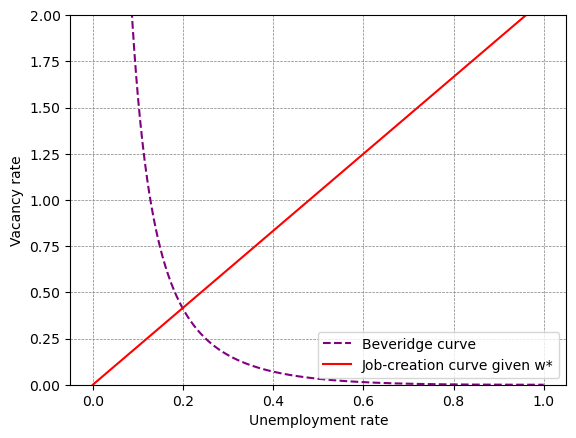

In [16]:
## Beveridge curve equilibrium: plot all admissable values of tightness
#opt_w = y-(r+δ)/(AA*(v/u)**(-φ)) * κ
v_jc = (((r+δ)* κ)/((y-opt_w)* AA) ) ** (-1/φ) * u_vec 


plt.plot(u_vec,v_bev, label = 'Beveridge curve', color = 'purple', linestyle = 'dashed')
plt.plot(u_vec,v_jc, label = 'Job-creation curve given w*', color = 'red')
plt.ylim(0,2)
plt.xlabel('Unemployment rate')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Vacancy rate')
plt.legend()
plt.savefig('v_u_eq.pdf')
plt.show()

C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\1286655780.py:9: RuntimeWarning: divide by zero encountered in power
  out = AA*θ**(-φ)


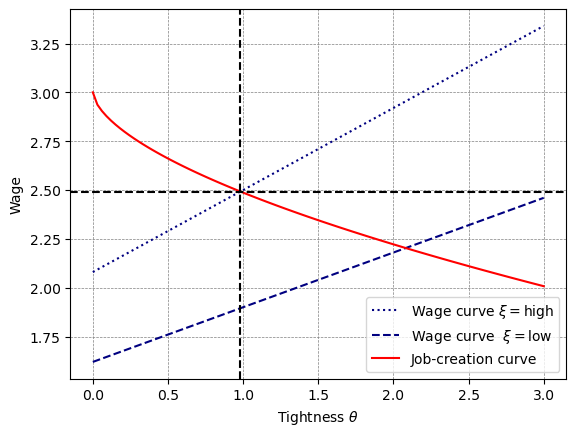

In [17]:
## Comparative statics
## Higher worker bargaining power
## The Job creation curve
w_jc = y-(r+δ)/η(θ_vec,φ) * κ

μ1 = μ*1.5
## The wage curve
w_wc1 = μ1*κ*θ_vec + μ1*y + (1-μ1)*b

## Find equilibrium tightness
def fct_θ1(guess):
    out = μ1*κ*guess + μ1*y + (1-μ1)*b - (y-(r+δ)/η(guess,φ) * κ)
    return out**2
opt_θ1 = optimize.newton(fct_θ1, 2) 
opt_w1 = y-(r+δ)/η(opt_θ1,φ) * κ

plt.plot(θ_vec,w_wc1, label = r'Wage curve $\xi=$high', color = 'navy', linestyle = 'dotted')
plt.plot(θ_vec,w_wc, label = r'Wage curve  $\xi=$low', color = 'navy', linestyle = 'dashed')
plt.plot(θ_vec,w_jc, label = 'Job-creation curve', color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(opt_θ1, color= 'black', linestyle = 'dashed')
plt.axhline(opt_w1, color= 'black', linestyle = 'dashed')
plt.ylabel('Wage')
plt.xlabel(r'Tightness $\theta$')
plt.legend()
plt.savefig('wage_bp.pdf')
plt.show()


C:\Users\qwp970\AppData\Local\Temp\ipykernel_19436\1286655780.py:9: RuntimeWarning: divide by zero encountered in power
  out = AA*θ**(-φ)


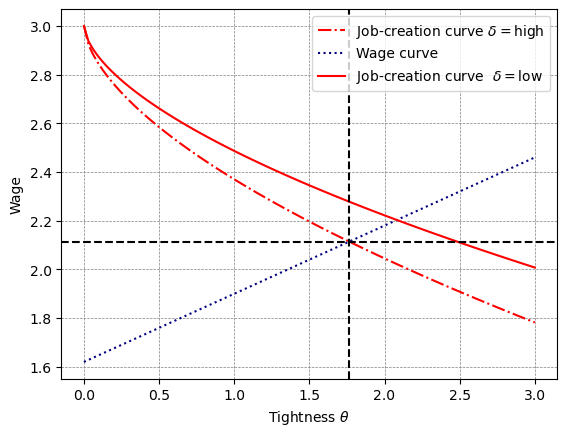

In [18]:
## Comparative statics
## Higher worker bargaining power
## The Job creation curve
w_jc = y-(r+δ)/η(θ_vec,φ) * κ

δ1 = δ*1.5
## The wage curve
w_jc1 = y-(r+δ1)/η(θ_vec,φ) * κ

## Find equilibrium tightness
def fct_θ2(guess):
    out = μ*κ*guess + μ*y + (1-μ)*b - (y-(r+δ1)/η(guess,φ) * κ)
    return out**2
opt_θ2 = optimize.newton(fct_θ2, 2) 
opt_w2 = y-(r+δ1)/η(opt_θ2,φ) * κ

plt.plot(θ_vec,w_jc1, label = r'Job-creation curve $\delta=$high', color = 'red',linestyle = '-.')
plt.plot(θ_vec,w_wc, label = r'Wage curve ', color = 'navy', linestyle = 'dotted')
plt.plot(θ_vec,w_jc, label = 'Job-creation curve  $\delta=$low', color = 'red')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(opt_θ2, color= 'black', linestyle = 'dashed')
plt.axhline(opt_w2, color= 'black', linestyle = 'dashed')
plt.ylabel('Wage')
plt.xlabel(r'Tightness $\theta$')
plt.legend()
plt.savefig('wage_delta.pdf')
plt.show()

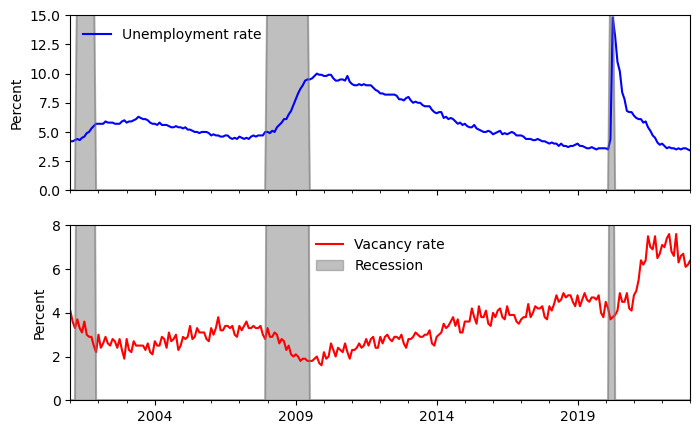

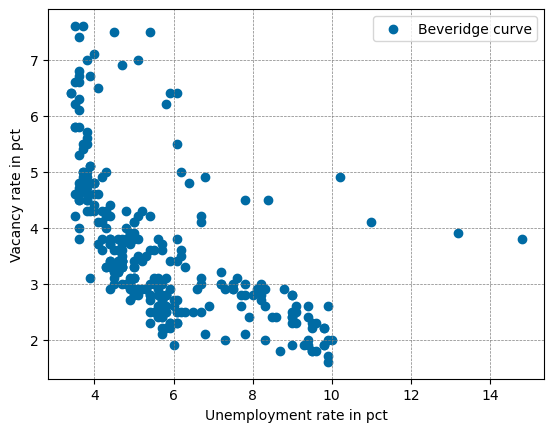

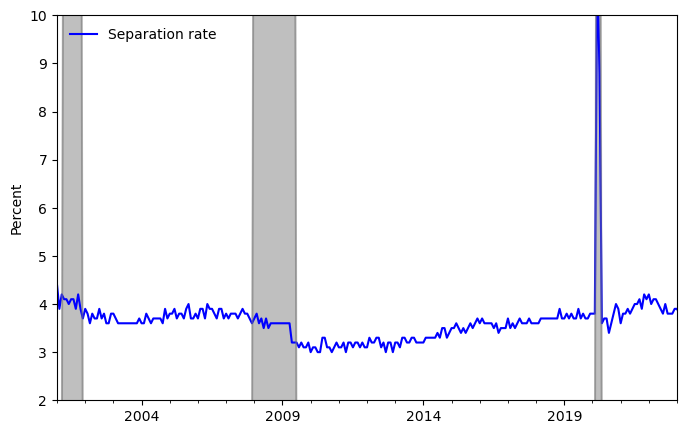

In [19]:
## Empirical figures
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')
mult = 20
us_unemp = fred.get_series('UNRATE') #unemployment

us_sep = fred.get_series('JTSTSR') #separation rate
us_vaca = fred.get_series('JTUJOR') #unemployment
us_rec = fred.get_series('USREC')*mult #recession indicator

## Time series comparison
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
us_unemp.plot.line(ax=ax1, figsize=(8, 5), x='DATE', color="blue", label = 'Unemployment rate')
us_rec.plot.area(ax=ax1, figsize=(8, 5), x='DATE', alpha=0.5, color="gray")
ax1.set_ylabel('Percent')
ax1.set_xlim("2001-01-01", "2023-01-01")
ax1.set_ylim(0,15)
ax1.legend(frameon = False)

us_vaca.plot.line(ax=ax2, figsize=(8, 5), x='DATE', color="red", label = 'Vacancy rate')
us_rec.plot.area(ax=ax2, figsize=(8, 5), x='DATE', alpha=0.5, color="gray", label = 'Recession')
ax2.set_xlim("2001-01-01", "2023-01-01")
ax2.set_ylim(0,8)
ax2.set_ylabel('Percent')
ax2.legend(frameon = False)
plt.savefig('ts_vacancy.pdf')
plt.show()


## Beveridge curve
us_unemp_cut = us_unemp[635:-1]
plt.scatter(us_unemp_cut,us_vaca,label= 'Beveridge curve' )
plt.xlabel('Unemployment rate in pct')
plt.ylabel('Vacancy rate in pct')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('beveridge.pdf')
plt.show()

## Time series separations
fig, ax = plt.subplots(1, 1, sharex=True)
us_sep.plot.line( figsize=(8, 5), x='DATE', color="blue", label = 'Separation rate')
us_rec.plot.area( figsize=(8, 5), x='DATE', alpha=0.5, color="gray")
ax.set_ylabel('Percent')
ax.set_xlim("2001-01-01", "2023-01-01")
ax.set_ylim(2,10)
ax.legend(frameon = False)
plt.savefig('ts_sep.pdf')
plt.show()


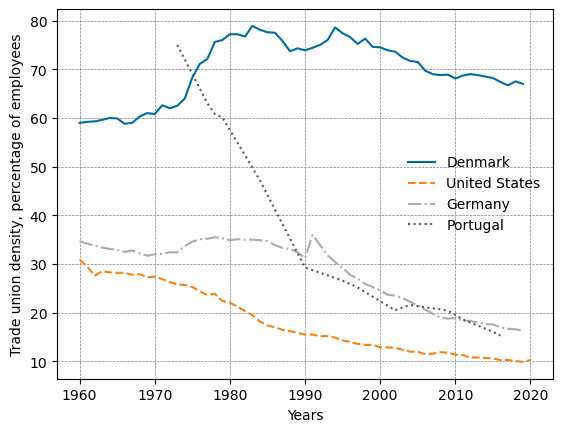

In [24]:
## Unionization
import datetime as dt



url ='https://sdmx.oecd.org/public/rest/data/OECD.ELS.SAE,DSD_TUD_CBC@DF_TUD,/all?startPeriod=1940&dimensionAtObservation=AllDimensions&format=csvfilewithlabels'
unions = pd.read_csv(url) 
#print(gdp.columns)
#print(gdp['UNIT_MEASURE'].unique())
country_set = ('DNK','USA', 'DEU', 'PRT')
country_label = ('Denmark','United States', 'Germany', 'Portugal')

## Gross Domestic Product, millions, national currency, current prices
for cc in range(4):
    country = country_set[cc]
    clabel = country_label[cc]
    selector = ((unions['REF_AREA'] == country)  )
    unions_1 = unions.loc[selector]
    unions_1 = unions_1.sort_values(by= 'TIME_PERIOD')
    plt.plot(unions_1.TIME_PERIOD,unions_1.OBS_VALUE, label = clabel, linestyle = lines[cc])
plt.ylabel('Trade union density, percentage of employees')
plt.xlabel('Years')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('union_density.pdf')
plt.show()

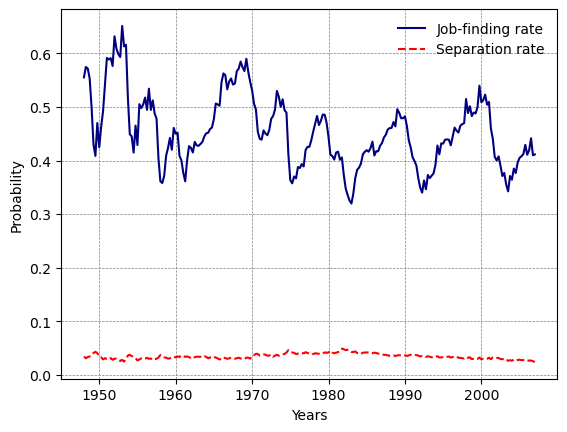

In [25]:
import numpy as np
import pandas as pd

data = pd.read_excel(r"Shimer.xlsx")

finding = data['finding']
sep = data['separation']


plt.plot(data['year'],data['finding'], label = 'Job-finding rate', color = 'navy')
plt.plot(data['year'],data['separation'], label = 'Separation rate', color = 'red', linestyle = 'dashed')
plt.ylabel('Probability')
plt.xlabel('Years')
plt.legend(frameon=False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('shimer.pdf')
plt.show()